# import libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression


# Load the dataset

In [3]:
df=pd.read_csv("heart.csv")

### print the first 5 rows in the dataset

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### replace the column name for better understanding

In [24]:
df.rename(columns={
    "cp":"Chest Pain",
    "trestbps":"Resting Blood Pressure",
    "chol":"Cholestoral",
    "fbs":"Fasting Blood Sugar",
    "restecg":"Resting Electrocardiographic",
    "thalach":"Maximum Heart Rate",
    "exang":"Exercise Induced Angina",
    }, inplace=True)

### print the last 5 rows in the dataset

In [25]:
df.tail()

,age,sex,Chest Pain,Resting Blood Pressure,Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic,Maximum Heart Rate,Exercise Induced Angina,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### check the information of the dataset

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1025 non-null   int64  
 1   sex                           1025 non-null   int64  
 2   Chest Pain                    1025 non-null   int64  
 3   Resting Blood Pressure        1025 non-null   int64  
 4   Cholestoral                   1025 non-null   int64  
 5   Fasting Blood Sugar           1025 non-null   int64  
 6   Resting Electrocardiographic  1025 non-null   int64  
 7   Maximum Heart Rate            1025 non-null   int64  
 8   Exercise Induced Angina       1025 non-null   int64  
 9   oldpeak                       1025 non-null   float64
 10  slope                         1025 non-null   int64  
 11  ca                            1025 non-null   int64  
 12  thal                          1025 non-null   int64  
 13  tar

### size of the dataset

In [27]:
df.shape

(1025, 14)

### check mising values

In [28]:
df.isnull().sum()

age                             0
sex                             0
Chest Pain                      0
Resting Blood Pressure          0
Cholestoral                     0
Fasting Blood Sugar             0
Resting Electrocardiographic    0
Maximum Heart Rate              0
Exercise Induced Angina         0
oldpeak                         0
slope                           0
ca                              0
thal                            0
target                          0
dtype: int64

# Data-Preprocessing

### statistical information about the dataset

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
Chest Pain,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
Resting Blood Pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
Cholestoral,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
Fasting Blood Sugar,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
Resting Electrocardiographic,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
Maximum Heart Rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
Exercise Induced Angina,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### numerical feature analysis

In [31]:
def plot_histogram(df,column_name):
    
    plt.figure(figsize=(10,4))
    sns.histplot(df[column_name],kde=True)
    plt.title(f"Distribution of {column_name}")
    
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()
    
    
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="blue", linestyle=":", label="Median")
    
    plt.legend()
    
    plt.show()
    
    

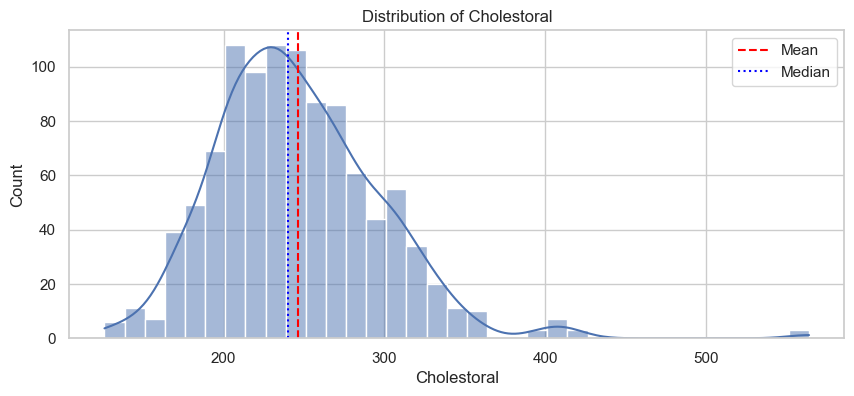

In [32]:
plot_histogram(df,"Cholestoral")

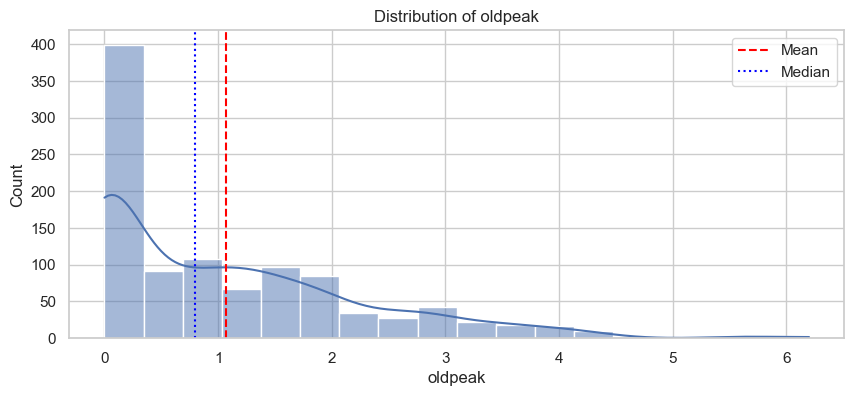

In [33]:
plot_histogram(df, "oldpeak")

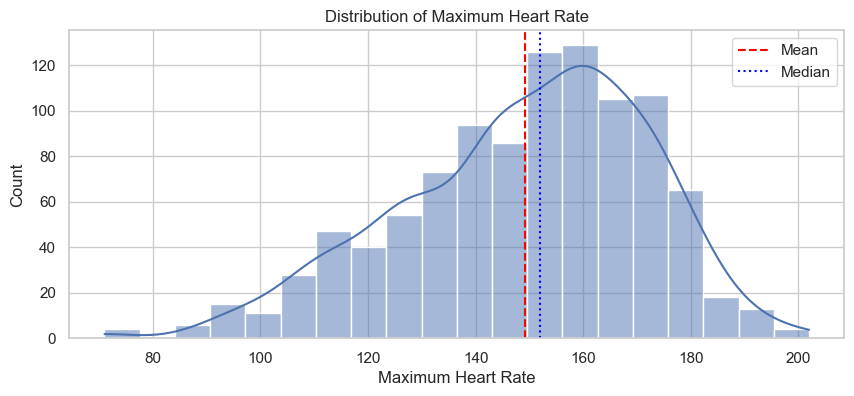

In [34]:
plot_histogram(df,"Maximum Heart Rate")

### boxplot for numerical features

In [14]:
def plot_boxplot(df,column_name):
    
    plt.figure(figsize=(10,4))
    sns.boxplot(y=df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.ylabel(column_name)
    plt.show()

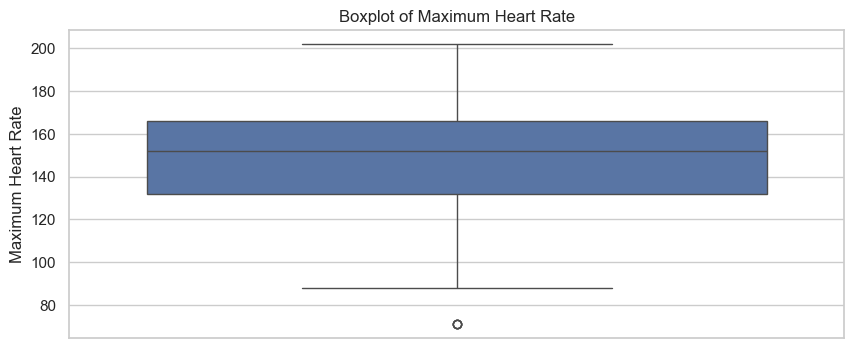

In [35]:
plot_boxplot(df,"Maximum Heart Rate")

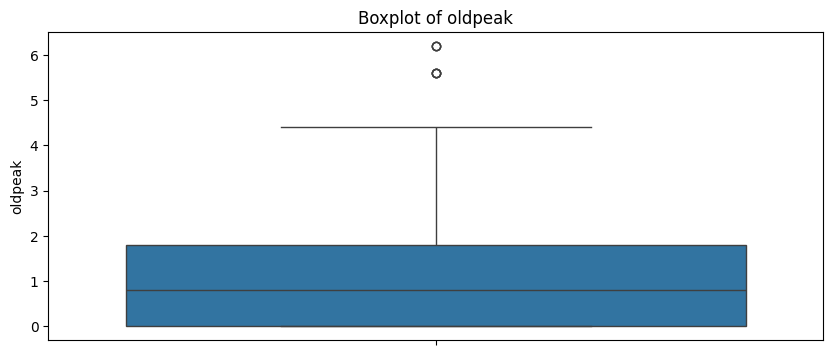

In [16]:
plot_boxplot(df,"oldpeak")

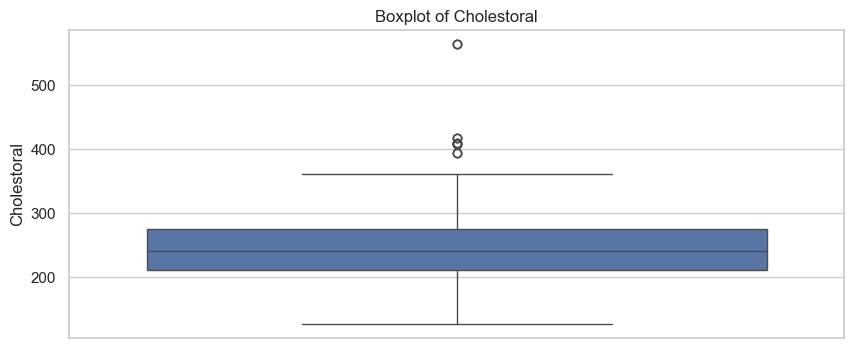

In [36]:
plot_boxplot(df,"Cholestoral")

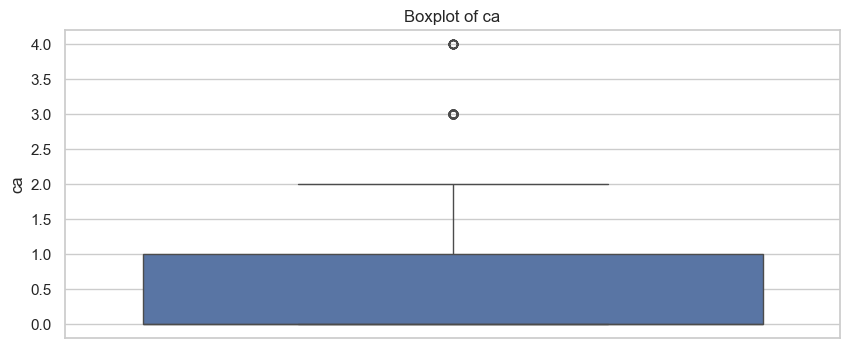

In [37]:
plot_boxplot(df,"ca")

#### from the above boxplot the dataset have some outliers . To remove outliers use iqr method

In [40]:
column=["ca","Cholestoral","oldpeak","Maximum Heart Rate"]

In [41]:
# iqr method
Q1=df[column].quantile(0.25)
Q3 =df[column].quantile(0.75)

iqr=Q3-Q1

lowerbound=Q1 - 1.5 * iqr
upperbound=Q3 + 1.5 * iqr

df_iqr_cleaned = df[~((df[column] < lowerbound) | (df[column] > upperbound)).any(axis=1)]






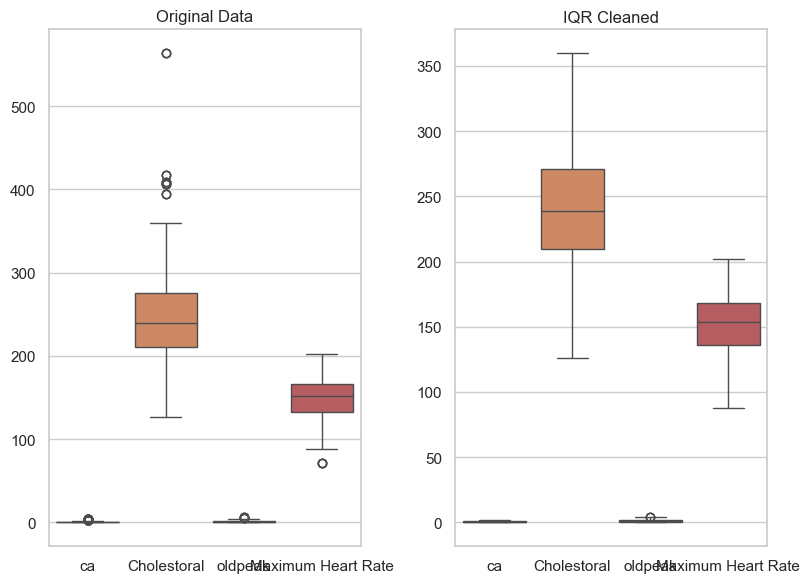

In [42]:
# Plot box plots before and after outlier removal
plt.figure(figsize=(12, 6))
for i, dataset in enumerate([df, df_iqr_cleaned], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=dataset[column])
    plt.title(["Original Data", "IQR Cleaned"][i-1])
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18980\2936184626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2", ax=axes[0, 0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18980\2936184626.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="age", y="target", data=df, ci=None, ax=axes[0, 1])


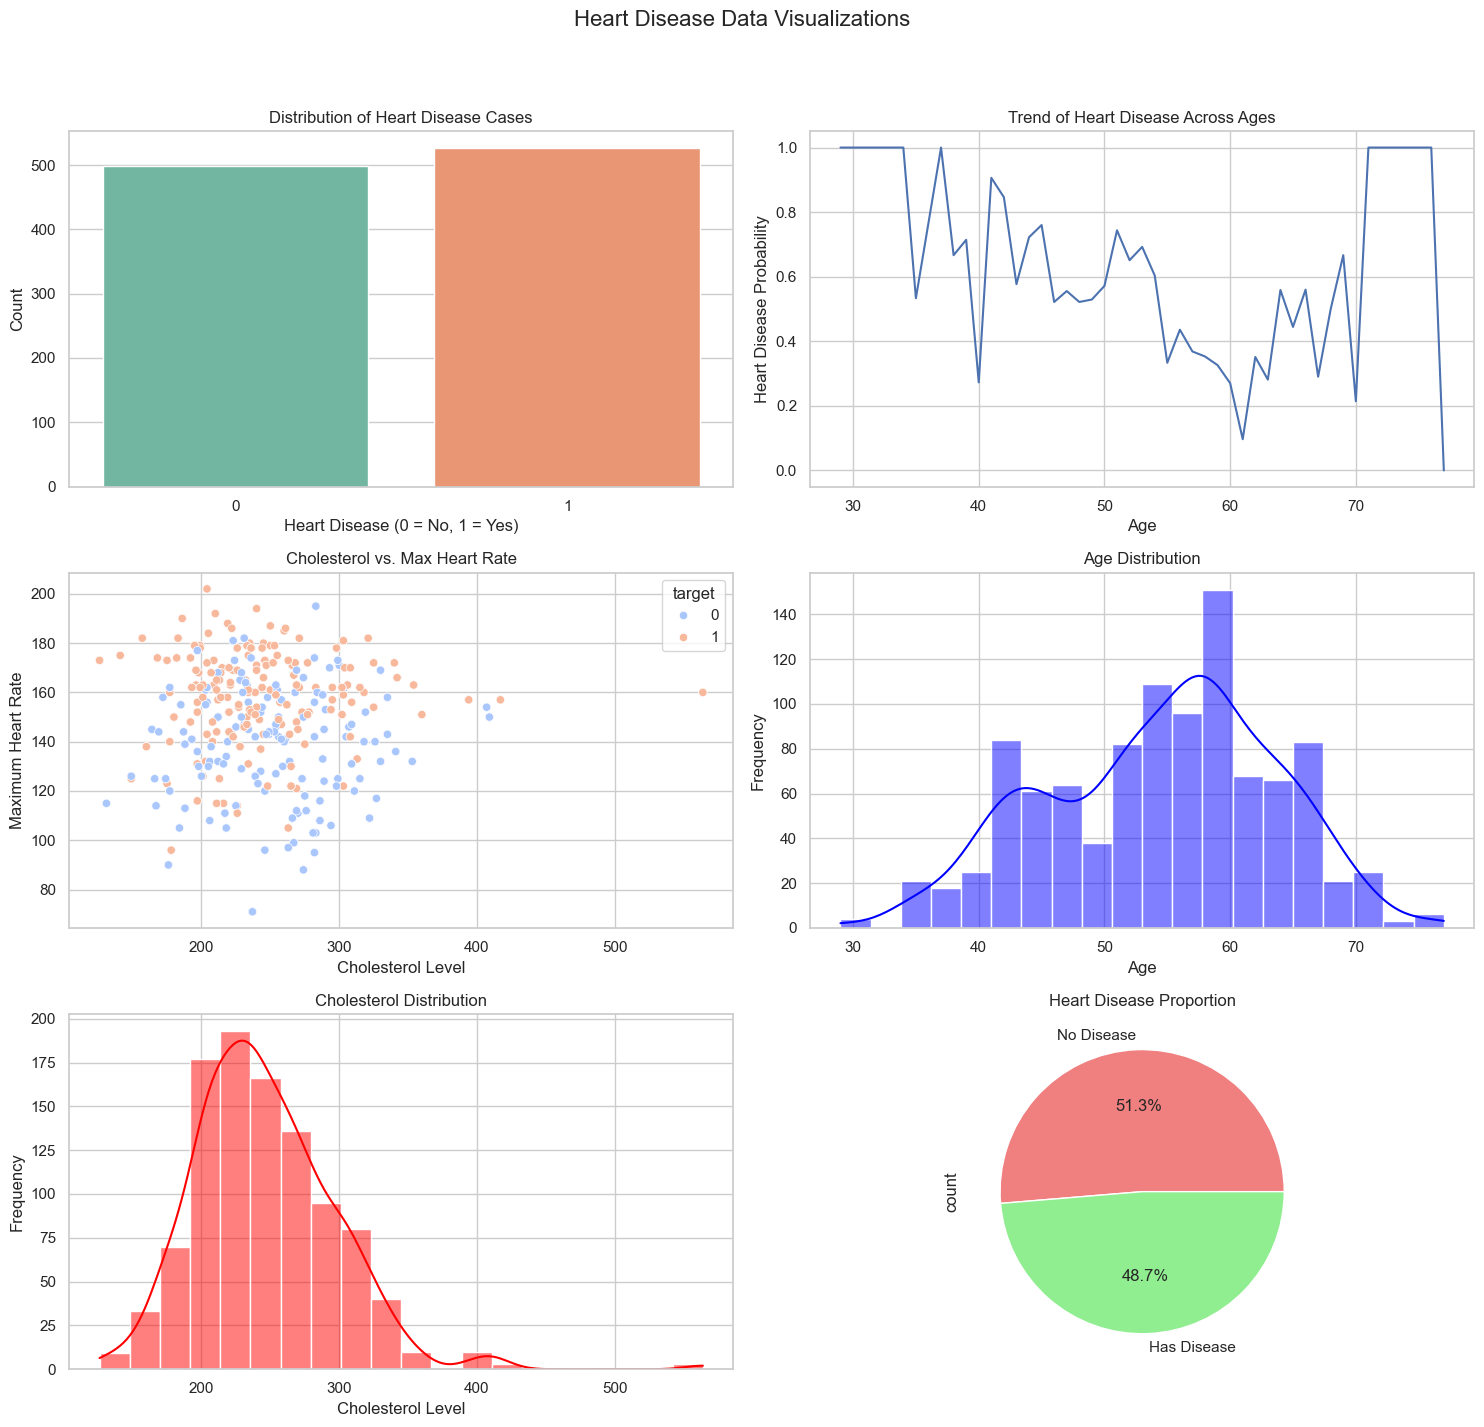

In [44]:
# Set style for better visualization
sns.set(style="whitegrid")

# Create subplots for multiple visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Creates a 3x2 grid of plots
fig.suptitle("Heart Disease Data Visualizations", fontsize=16)  # Main title for the figure

# 📊 Bar Chart – Distribution of heart disease cases
sns.countplot(x="target", data=df, palette="Set2", ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Heart Disease Cases")
axes[0, 0].set_xlabel("Heart Disease (0 = No, 1 = Yes)")
axes[0, 0].set_ylabel("Count")

# 📈 Line Chart – Heart disease trend across ages
sns.lineplot(x="age", y="target", data=df, ci=None, ax=axes[0, 1])
axes[0, 1].set_title("Trend of Heart Disease Across Ages")
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Heart Disease Probability")

# 🔵 Scatter Plot – Cholesterol levels vs. Maximum heart rate
sns.scatterplot(x="Cholestoral", y="Maximum Heart Rate", hue="target", data=df, palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Cholesterol vs. Max Heart Rate")
axes[1, 0].set_xlabel("Cholesterol Level")
axes[1, 0].set_ylabel("Maximum Heart Rate")

# 📉 Histogram – Distribution of Age
sns.histplot(df["age"], bins=20, kde=True, color="blue", ax=axes[1, 1])
axes[1, 1].set_title("Age Distribution")
axes[1, 1].set_xlabel("Age")
axes[1, 1].set_ylabel("Frequency")

# 📉 Histogram – Distribution of Cholesterol
sns.histplot(df["Cholestoral"], bins=20, kde=True, color="red", ax=axes[2, 0])
axes[2, 0].set_title("Cholesterol Distribution")
axes[2, 0].set_xlabel("Cholesterol Level")
axes[2, 0].set_ylabel("Frequency")

# 🍕 Pie Chart – Proportion of patients with and without heart disease
df["target"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightcoral", "lightgreen"], labels=["No Disease", "Has Disease"], ax=axes[2, 1])
axes[2, 1].set_title("Heart Disease Proportion")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Split the data into train and test

In [56]:
X= df.drop(columns="target")
y=df["target"]

In [57]:
X

,age,sex,Chest Pain,Resting Blood Pressure,Cholestoral,Fasting Blood Sugar,Resting Electrocardiographic,Maximum Heart Rate,Exercise Induced Angina,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [58]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

### check the value count for target variable if the data is imbalanced or not

In [59]:
y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### in this dataset some columns have different units and ranges (values==magnitude). if we didnt apply standard scaler, may be the column with longer magnitude(values) might dominate those with smaller magnitude(values).this is lead to bias


In [62]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

### train logistic regression model

In [63]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

1. first predict the class labels
   * if the probability is >= 0.5, it predicts 1
   * if the probability is <= 0.5, its predict 0
2. predict_proba() returns the probability for each class.
   * Column 0: Probability of class 0
   * Column 1: Probability of class 1
3. [:, 1] selects only the probabilities for class 1 (heart disease).

In [64]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [67]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

In [68]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902
F1 Score: 0.8108108108108109
ROC-AUC Score: 0.8787359604035789
Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



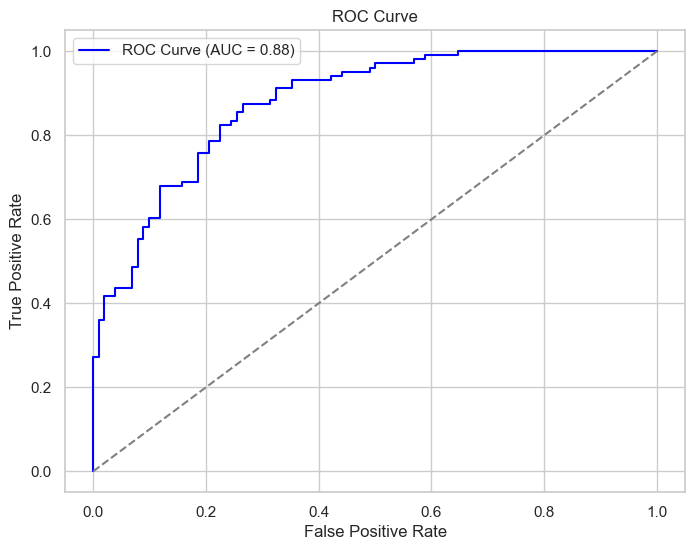

In [69]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()